In [1]:
##
##
##
## PowerSystem_Dataset
##
##o

In [2]:
##
##
##
## preprocessing du dataset
##
##
## 

In [1]:

from sklearn import metrics
from sklearn import preprocessing
from sklearn import model_selection
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score,auc, accuracy_score

from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split
from scipy.stats import entropy
from statsmodels.tsa import stattools
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.ensemble import *

from sklearn.datasets import load_digits
from sklearn.feature_selection import SelectKBest, chi2

In [2]:
#on rassemble tous les datasets
data_1 = pd.read_csv("data1.csv")
for dataseti in range(2,16):
    data_1 = pd.concat([data_1,  pd.read_csv("data"+str(dataseti)+".csv")],ignore_index = True)

In [3]:
##
##
##
## description du dataset 
##
##
## 

In [4]:
data_1.describe()

,R1-PA1:VH,R1-PM1:V,R1-PA2:VH,R1-PM2:V,R1-PA3:VH,R1-PM3:V,R1-PA4:IH,R1-PM4:I,R1-PA5:IH,R1-PM5:I,...,control_panel_log3,control_panel_log4,relay1_log,relay2_log,relay3_log,relay4_log,snort_log1,snort_log2,snort_log3,snort_log4
count,78377.000000,78377.000000,78377.000000,78377.000000,78377.000000,78377.000000,78377.000000,78377.000000,78377.000000,78377.000000,...,78377.000000,78377.000000,78377.000000,78377.000000,78377.000000,78377.000000,78377.000000,78377.000000,78377.000000,78377.000000
mean,-15.802424,130764.039577,2.175196,131035.528095,6.834315,131395.717581,-14.334996,393.949321,3.538540,387.438133,...,0.000026,0.000026,0.035916,0.026436,0.026500,0.035597,0.000051,0.000051,0.000089,0.000077
std,100.876750,8546.118477,111.743169,5393.135370,97.065063,5443.752388,99.601107,190.966011,109.504977,151.277183,...,0.005051,0.005051,0.186082,0.160430,0.160618,0.185285,0.007144,0.007144,0.009450,0.008749
min,-179.988962,0.000000,-179.994691,0.000000,-179.994691,0.000000,-179.994691,0.000000,-179.994691,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-100.416583,131057.982300,-102.129727,130732.029800,-69.459673,131133.202100,-98.159129,305.793700,-94.790138,311.836330,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,-28.865614,131684.814000,8.118812,131358.861500,13.401483,131760.033900,-23.514188,378.671480,1.885031,383.249230,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,68.096034,132186.279400,104.897113,131885.400200,85.324875,132261.499300,66.274028,456.676340,102.674037,460.338540,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,179.994691,151592.990400,179.994691,151567.917200,179.988962,151693.283500,179.994691,1779.462980,179.994691,1265.656320,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [5]:
data_1.columns.values

array(['R1-PA1:VH', 'R1-PM1:V', 'R1-PA2:VH', 'R1-PM2:V', 'R1-PA3:VH',
       'R1-PM3:V', 'R1-PA4:IH', 'R1-PM4:I', 'R1-PA5:IH', 'R1-PM5:I',
       'R1-PA6:IH', 'R1-PM6:I', 'R1-PA7:VH', 'R1-PM7:V', 'R1-PA8:VH',
       'R1-PM8:V', 'R1-PA9:VH', 'R1-PM9:V', 'R1-PA10:IH', 'R1-PM10:I',
       'R1-PA11:IH', 'R1-PM11:I', 'R1-PA12:IH', 'R1-PM12:I', 'R1:F',
       'R1:DF', 'R1-PA:Z', 'R1-PA:ZH', 'R1:S', 'R2-PA1:VH', 'R2-PM1:V',
       'R2-PA2:VH', 'R2-PM2:V', 'R2-PA3:VH', 'R2-PM3:V', 'R2-PA4:IH',
       'R2-PM4:I', 'R2-PA5:IH', 'R2-PM5:I', 'R2-PA6:IH', 'R2-PM6:I',
       'R2-PA7:VH', 'R2-PM7:V', 'R2-PA8:VH', 'R2-PM8:V', 'R2-PA9:VH',
       'R2-PM9:V', 'R2-PA10:IH', 'R2-PM10:I', 'R2-PA11:IH', 'R2-PM11:I',
       'R2-PA12:IH', 'R2-PM12:I', 'R2:F', 'R2:DF', 'R2-PA:Z', 'R2-PA:ZH',
       'R2:S', 'R3-PA1:VH', 'R3-PM1:V', 'R3-PA2:VH', 'R3-PM2:V',
       'R3-PA3:VH', 'R3-PM3:V', 'R3-PA4:IH', 'R3-PM4:I', 'R3-PA5:IH',
       'R3-PM5:I', 'R3-PA6:IH', 'R3-PM6:I', 'R3-PA7:VH', 'R3-PM7:V',
       'R3-PA8:VH',

In [6]:
print(pd.Series(data_1['marker']).value_counts())

Attack      55663
Natural     18309
NoEvents     4405
Name: marker, dtype: int64


In [7]:
data_1 = data_1.replace({'Attack': 2, 'Natural': 1,'NoEvents':0})

In [8]:
data_1.isnull().values.any()#nan values ?

False

In [9]:
data_1.isnull().any().any()

False

In [10]:
is_infini = np.isinf(data_1)

row_has_infini = is_infini.any(axis=1)

rows_with_infini = data_1[row_has_infini]

In [11]:
rows_with_infini.iloc[150].values
#il y a des valeurs infinies

array([-1.24091199e+02,  5.85711587e+04,  1.31390682e+02,  1.22608290e+05,
       -6.80100903e+00,  1.26469574e+05,  1.78092472e+02,  1.68149913e+03,
       -1.43972835e+02,  5.34681200e+01,  8.35028691e+01,  5.82289800e+01,
       -1.19043441e+02,  1.01396304e+05,  6.77866367e+01,  3.30967164e+04,
        6.77178818e+01,  1.02549674e+04, -1.79994691e+02,  5.28272350e+02,
        1.77175739e+02,  5.80458700e+02,  1.77250224e+02,  5.72951190e+02,
        6.00560000e+01, -2.00000000e-01,  5.15957647e-01,  1.17204394e+00,
        2.05800000e+03, -1.49735423e+02,  1.26584250e+05,  9.03213492e+01,
        1.26429305e+05, -2.97207656e+01,  1.26661039e+05,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00, -1.49713444e+02,  1.26556773e+05,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  

In [12]:
rows_with_infini[rows_with_infini['marker']==1].count()
# il y a des valeurs infinies

R1-PA1:VH     2086
R1-PM1:V      2086
R1-PA2:VH     2086
R1-PM2:V      2086
R1-PA3:VH     2086
              ... 
snort_log1    2086
snort_log2    2086
snort_log3    2086
snort_log4    2086
marker        2086
Length: 129, dtype: int64

In [13]:
#on remplace les valeurs infinies par 2 fois la valeur max du dataset
for column in data_1:
    is_infini = np.isinf(data_1[column]).any()
    if is_infini == True:
        data_1[column] = data_1[column].replace({np.inf: data_1[column][data_1[column]!=np.inf].max() *2, -np.inf: data_1[column][data_1[column]!= -np.inf].max() *2})
        

In [14]:
is_infini = np.isinf(data_1)

row_has_infini = is_infini.any(axis=1)

rows_with_infini = data_1[row_has_infini]
rows_with_infini.count()

R1-PA1:VH     0
R1-PM1:V      0
R1-PA2:VH     0
R1-PM2:V      0
R1-PA3:VH     0
             ..
snort_log1    0
snort_log2    0
snort_log3    0
snort_log4    0
marker        0
Length: 129, dtype: int64

In [15]:
list_ndiscrt = list(data_1.columns.values)
list_ndiscrt.remove('marker')



In [16]:
############### preprocessing from sklearn.preprocessing import MinMaxScaler

In [17]:
from sklearn.preprocessing import StandardScaler

In [18]:
scaler = StandardScaler()
data_1_x = data_1.drop(['marker'],axis=1)

In [19]:
data_1[list_ndiscrt] = scaler.fit_transform(data_1_x)

In [20]:
data_1

,R1-PA1:VH,R1-PM1:V,R1-PA2:VH,R1-PM2:V,R1-PA3:VH,R1-PM3:V,R1-PA4:IH,R1-PM4:I,R1-PA5:IH,R1-PM5:I,...,control_panel_log4,relay1_log,relay2_log,relay3_log,relay4_log,snort_log1,snort_log2,snort_log3,snort_log4,marker
0,0.854531,-0.361681,-0.463096,-0.628119,-1.817479,-0.674627,0.803456,1.109952,-0.552874,1.582188,...,-0.005052,-0.193013,-0.164785,-0.164989,-0.192123,-0.007144,-0.007144,-0.009451,-0.00875,0
1,0.887133,-0.056556,-0.433818,-0.144609,-1.783479,-0.191007,0.865124,0.469428,-0.497569,0.750619,...,-0.005052,-0.193013,-0.164785,-0.164989,-0.192123,-0.007144,-0.007144,-0.009451,-0.00875,0
2,0.887587,-0.053622,-0.433408,-0.139960,-1.783007,-0.186401,0.864893,0.469428,-0.497255,0.750619,...,-0.005052,-0.193013,-0.164785,-0.164989,-0.192123,-0.007144,-0.007144,-0.009451,-0.00875,0
3,0.891052,-0.021349,-0.430229,-0.088819,-1.779406,-0.135736,0.868345,0.465592,-0.492912,0.738515,...,-0.005052,-0.193013,-0.164785,-0.164989,-0.192123,-0.007144,-0.007144,-0.009451,-0.00875,0
4,0.895710,0.037329,-0.425973,0.004164,-1.774684,-0.043618,0.868000,0.474222,-0.489040,0.728831,...,-0.005052,-0.193013,-0.164785,-0.164989,-0.192123,-0.007144,-0.007144,-0.009451,-0.00875,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78372,1.560248,0.131214,0.173891,0.152936,-1.083990,0.103771,1.583158,-0.442455,0.170018,-0.477972,...,-0.005052,-0.193013,-0.164785,-0.164989,-0.192123,-0.007144,-0.007144,-0.009451,-0.00875,1
78373,1.559623,0.140015,0.173532,0.162234,-1.084580,0.112983,1.579764,-0.437661,0.167821,-0.475551,...,-0.005052,-0.193013,-0.164785,-0.164989,-0.192123,-0.007144,-0.007144,-0.009451,-0.00875,1
78374,1.558033,0.148817,0.171994,0.176182,-1.086351,0.126801,1.569122,-0.422319,0.161699,-0.464657,...,-0.005052,-0.193013,-0.164785,-0.164989,-0.192123,-0.007144,-0.007144,-0.009451,-0.00875,1
78375,1.557863,0.148817,0.171789,0.176182,-1.086410,0.131407,1.567914,-0.423278,0.161228,-0.462237,...,-0.005052,-0.193013,-0.164785,-0.164989,-0.192123,-0.007144,-0.007144,-0.009451,-0.00875,1


In [ ]:
#on prépare un dataset pCA

In [23]:
######################### pca

In [24]:
from sklearn.decomposition import PCA

In [25]:
pca = PCA(n_components = 50)

In [26]:
Y = data_1.drop(list_ndiscrt,axis=1)

In [27]:
principalComponents = pca.fit_transform(data_1.drop(['marker'],axis=1))

In [28]:
data_1_pca = pd.DataFrame(data = principalComponents)

In [29]:
data_1_pca = pd.concat([data_1_pca,Y],axis=1)
data_1_pca.head()

,0,1,2,3,4,5,6,7,8,9,...,41,42,43,44,45,46,47,48,49,marker
0,2.420369,5.696344,-0.134430,-0.745637,-2.123962,0.505429,3.580283,-2.625757,0.040607,2.869532,...,-0.415298,0.123553,0.073015,-0.256711,0.045328,0.002878,-0.198080,-0.065237,-0.154339,0
1,0.600199,5.748159,-0.138644,-0.531060,-2.032720,-0.010869,1.736701,-1.152520,-0.030170,2.966230,...,0.195020,-0.055071,0.040207,-0.210575,-0.057771,0.005486,-0.247340,0.033993,0.265923,0
2,0.595569,5.747852,-0.137412,-0.533613,-2.034144,-0.011075,1.732103,-1.156789,-0.030120,2.962213,...,0.188128,-0.055290,0.040866,-0.209453,-0.054928,0.005219,-0.248133,0.044034,0.257487,0
3,0.497935,5.775781,-0.138816,-0.579026,-2.036042,-0.030142,1.679764,-1.177645,-0.030624,3.007228,...,0.195381,-0.051482,0.039907,-0.204235,-0.051511,0.005199,-0.246569,0.028915,0.238508,0
4,0.328773,5.781887,-0.144335,-0.663534,-2.073135,-0.057613,1.610266,-1.252736,-0.028362,3.023222,...,0.177204,-0.052277,0.042378,-0.199438,-0.034858,0.004531,-0.237122,0.005719,0.175369,0


In [30]:
########################## test classifiers sur données brutes

In [31]:
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.svm import SVC
from sklearn import ensemble

In [32]:
data_1_train = data_1.sample(frac=0.7)
data_1_test = data_1.drop(data_1_train.index)

data_1_train_x = data_1_train.drop(['marker'],axis=1)
data_1_train_y = data_1_train['marker']

data_1_test_x = data_1_test.drop(['marker'],axis=1)
data_1_test_y = data_1_test['marker']

In [33]:
## decision tree

In [34]:
from sklearn import tree
model = tree.DecisionTreeClassifier()

In [35]:
model.fit(data_1_train_x,data_1_train_y)
y_dct = model.predict(data_1_test_x)
accuracy_score(data_1_test_y,y_dct)

0.8457874367371242

In [36]:
confusion_matrix(data_1_test_y, y_dct)

array([[ 1133,    51,   127],
       [   36,  3889,  1609],
       [  127,  1676, 14865]])

In [37]:
## random forest

In [38]:
model = ensemble.RandomForestClassifier()

model.fit(data_1_train_x,data_1_train_y)
y_dct = model.predict(data_1_test_x)
accuracy_score(data_1_test_y,y_dct)

0.9155786160847191

In [39]:
confusion_matrix(data_1_test_y, y_dct)

array([[ 1222,     5,    84],
       [    6,  3985,  1543],
       [   14,   333, 16321]])

In [40]:
from sklearn.metrics import f1_score
f1_score(data_1_test_y, y_dct, average=None)

array([0.95730513, 0.80856244, 0.94297435])

Text(0.5, 1.0, 'importance de la feature')

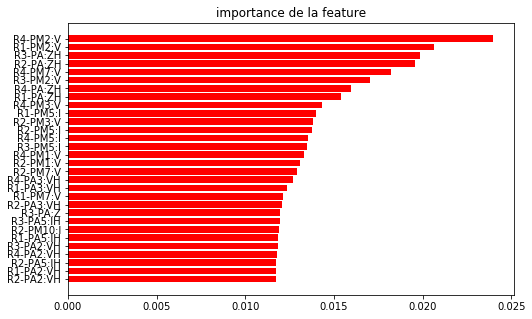

In [41]:
importances = model.feature_importances_
indices = np.argsort(importances)[-30:]

plt.figure(figsize=(8,5))
plt.barh(range(len(indices)),importances[indices],color='r',align='center')
plt.yticks(range(len(indices)),data_1.columns[indices])
plt.title("importance de la feature")

In [43]:
########## autres

In [44]:
model = KNeighborsClassifier()
model.fit(data_1_train_x,data_1_train_y)
y_dct = model.predict(data_1_test_x)
accuracy_score(data_1_test_y,y_dct)

0.8939597315436242

In [45]:
model = GradientBoostingClassifier()
model.fit(data_1_train_x,data_1_train_y)
y_dct = model.predict(data_1_test_x)
accuracy_score(data_1_test_y,y_dct)

0.8986577181208054

In [46]:
model = GaussianNB()
model.fit(data_1_train_x,data_1_train_y)
y_dct = model.predict(data_1_test_x)
accuracy_score(data_1_test_y,y_dct)

0.18120805369127516

In [47]:
model = SVC()
model.fit(data_1_train_x,data_1_train_y)
y_dct = model.predict(data_1_test_x)
accuracy_score(data_1_test_y,y_dct)

0.785234899328859

In [48]:


from sklearn import tree

model = tree.ExtraTreeClassifier()
model.fit(data_1_train_x,data_1_train_y)
y_dct = model.predict(data_1_test_x)
accuracy_score(data_1_test_y,y_dct)

0.9442953020134228

In [42]:


from sklearn.ensemble import ExtraTreesClassifier

model = ExtraTreesClassifier()
model.fit(data_1_train_x,data_1_train_y)
y_dct = model.predict(data_1_test_x)
accuracy_score(data_1_test_y,y_dct)

0.9289329307191766

In [43]:
from sklearn.metrics import f1_score
f1_score(data_1_test_y, y_dct, average=None)

array([0.94990138, 0.84931772, 0.95146086])

In [44]:


from sklearn.ensemble import ExtraTreesClassifier

model = ExtraTreesClassifier()
model.fit(data_1_train_x,data_1_train_y)
y_dct = model.predict(data_1_test_x)
accuracy_score(data_1_test_y,y_dct)

0.9292731680347042

In [51]:


from sklearn.neighbors import NearestCentroid

model = NearestCentroid()
model.fit(data_1_train_x,data_1_train_y)
y_dct = model.predict(data_1_test_x)
accuracy_score(data_1_test_y,y_dct)

0.5208053691275167

In [52]:


from sklearn.naive_bayes import BernoulliNB

model = BernoulliNB()
model.fit(data_1_train_x,data_1_train_y)
y_dct = model.predict(data_1_test_x)
accuracy_score(data_1_test_y,y_dct)

0.5671140939597316

In [53]:

from sklearn.neural_network import MLPClassifier
model = MLPClassifier(hidden_layer_sizes=(100,100,30), max_iter=1000,
                     solver='sgd')

model.fit(data_1_train_x,data_1_train_y)
y_dct = model.predict(data_1_test_x)
accuracy_score(data_1_test_y,   y_dct)

0.8986577181208054

In [54]:
from sklearn.ensemble import AdaBoostClassifier


model = AdaBoostClassifier()
model.fit(data_1_train_x,data_1_train_y)
y_dct = model.predict(data_1_test_x)
accuracy_score(data_1_test_y,y_dct)

0.4006711409395973

In [46]:
from sklearn.experimental import enable_hist_gradient_boosting  # noqa
from sklearn.ensemble import HistGradientBoostingClassifier
model = HistGradientBoostingClassifier()
model.fit(data_1_train_x,data_1_train_y)
y_dct = model.predict(data_1_test_x)
accuracy_score(data_1_test_y,y_dct)

0.9087035123966942

In [47]:
from sklearn.metrics import f1_score
f1_score(data_1_test_y, y_dct, average=None)

array([0.96385542, 0.7863464 , 0.93821751])

In [56]:
from sklearn.experimental import enable_hist_gradient_boosting  # noqa
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.datasets import make_classification
model = BaggingClassifier(base_estimator=tree.ExtraTreeClassifier(), n_estimators=10, random_state=0)
model.fit(data_1_train_x,data_1_train_y)
y_dct = model.predict(data_1_test_x)
accuracy_score(data_1_test_y,y_dct)


0.951006711409396

In [57]:
from sklearn.experimental import enable_hist_gradient_boosting  # noqa
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.datasets import make_classification
model = BaggingClassifier(base_estimator=HistGradientBoostingClassifier(), n_estimators=10, random_state=0)
model.fit(data_1_train_x,data_1_train_y)
y_dct = model.predict(data_1_test_x)
accuracy_score(data_1_test_y,y_dct)


0.9610738255033557

In [58]:
from sklearn.ensemble import VotingClassifier

classifiers = [
    ('etc', tree.ExtraTreeClassifier()),
    ('hgbc', HistGradientBoostingClassifier())
    
]
model = VotingClassifier(classifiers)

model.fit(data_1_train_x,data_1_train_y)
y_dct = model.predict(data_1_test_x)
accuracy_score(data_1_test_y,y_dct)

0.9449664429530201

In [59]:
#######  classifiers with pca

In [60]:
data_1_train = data_1_pca.sample(frac=0.7)
data_1_test = data_1_pca.drop(data_1_train.index)

data_1_train_x = data_1_train.drop(['marker'],axis=1)
data_1_train_y = data_1_train['marker']

data_1_test_x = data_1_test.drop(['marker'],axis=1)
data_1_test_y = data_1_test['marker']

In [61]:
from sklearn import tree
model = tree.DecisionTreeClassifier()

In [62]:
model.fit(data_1_train_x,data_1_train_y)
y_dct = model.predict(data_1_test_x)
accuracy_score(data_1_test_y,y_dct)

0.8845637583892617

In [63]:
confusion_matrix(data_1_test_y, y_dct)

array([[ 173,    1,   76],
       [   3,   40,    6],
       [  83,    3, 1105]])

In [64]:
model = ensemble.RandomForestClassifier()

model.fit(data_1_train_x,data_1_train_y)
y_dct = model.predict(data_1_test_x)
print(accuracy_score(data_1_test_y,y_dct))

print(confusion_matrix(data_1_test_y, y_dct))

0.9268456375838926
[[ 170    0   80]
 [   0   46    3]
 [  26    0 1165]]


In [65]:
model = KNeighborsClassifier()
model.fit(data_1_train_x,data_1_train_y)
y_dct = model.predict(data_1_test_x)
accuracy_score(data_1_test_y,y_dct)

0.8966442953020134

In [66]:
model = GradientBoostingClassifier()
model.fit(data_1_train_x,data_1_train_y)
y_dct = model.predict(data_1_test_x)
accuracy_score(data_1_test_y,y_dct)

0.8771812080536913

In [67]:
model = SVC()
model.fit(data_1_train_x,data_1_train_y)
y_dct = model.predict(data_1_test_x)
accuracy_score(data_1_test_y,y_dct)

0.8

In [68]:


from sklearn import tree

model = tree.ExtraTreeClassifier()
model.fit(data_1_train_x,data_1_train_y)
y_dct = model.predict(data_1_test_x)
accuracy_score(data_1_test_y,y_dct)

0.885234899328859

In [69]:


from sklearn.ensemble import ExtraTreesClassifier

model = ExtraTreesClassifier()
model.fit(data_1_train_x,data_1_train_y)
y_dct = model.predict(data_1_test_x)
accuracy_score(data_1_test_y,y_dct)

0.9389261744966443

In [70]:
model = GaussianNB()
model.fit(data_1_train_x,data_1_train_y)
y_dct = model.predict(data_1_test_x)
accuracy_score(data_1_test_y,y_dct)

0.37785234899328857

In [71]:


from sklearn.naive_bayes import BernoulliNB

model = BernoulliNB()
model.fit(data_1_train_x,data_1_train_y)
y_dct = model.predict(data_1_test_x)
accuracy_score(data_1_test_y,y_dct)

0.7228187919463087

In [72]:


from sklearn.neighbors import NearestCentroid

model = NearestCentroid()
model.fit(data_1_train_x,data_1_train_y)
y_dct = model.predict(data_1_test_x)
accuracy_score(data_1_test_y,y_dct)

0.5040268456375839

In [73]:

from sklearn.neural_network import MLPClassifier
model = MLPClassifier(hidden_layer_sizes=(30,30,10), max_iter=1000,
                     solver='sgd')

model.fit(data_1_train_x,data_1_train_y)
y_dct = model.predict(data_1_test_x)
accuracy_score(data_1_test_y,   y_dct)

/usr/local/lib64/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


0.863758389261745

In [74]:
from sklearn.ensemble import AdaBoostClassifier


model = AdaBoostClassifier()
model.fit(data_1_train_x,data_1_train_y)
y_dct = model.predict(data_1_test_x)
accuracy_score(data_1_test_y,y_dct)

0.7154362416107383

In [ ]:
from sklearn.experimental import enable_hist_gradient_boosting  # noqa
from sklearn.ensemble import HistGradientBoostingClassifier
model = HistGradientBoostingClassifier()
model.fit(data_1_train_x,data_1_train_y)
y_dct = model.predict(data_1_test_x)
accuracy_score(data_1_test_y,y_dct)

In [ ]:
from sklearn.ensemble import VotingClassifier

classifiers = [
    ('etc', tree.ExtraTreeClassifier()),
    ('hgbc', HistGradientBoostingClassifier()),
    ('knc', KNeighborsClassifier()),
]
model = VotingClassifier(classifiers)

model.fit(data_1_train_x,data_1_train_y)
y_dct = model.predict(data_1_test_x)
accuracy_score(data_1_test_y,y_dct)